In [2]:
# Importing all the necessary Libraries
# Important Libraries
import pandas as pd
import numpy as np

#Libraries for analysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Libraries for testing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Libraries for splitting
from sklearn.model_selection import train_test_split

#setting random seed
np.random.seed(0)

In [6]:
dia = pd.read_csv('E:/thyroidData.csv')
dia.head()

,TSH,T3,TT4,T4U,FTI,Class
0,0.00060,0.015,0.120,0.082,0.146,3
1,0.00025,0.030,0.143,0.133,0.108,3
2,0.00190,0.024,0.102,0.131,0.078,3
3,0.00090,0.017,0.077,0.090,0.085,3
4,0.00025,0.026,0.139,0.090,0.153,3


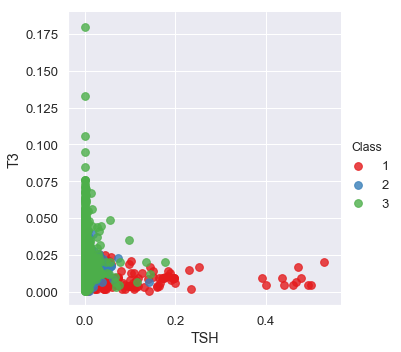

In [7]:
#plot two ingredients
sns.lmplot('TSH','T3', data = dia,hue='Class',
          palette='Set1',fit_reg=False,scatter_kws={"s":60})

In [8]:
#Splitting the datasets
X = dia.iloc[:,0:5] #ith location select all row and from column 0 to 7
y = dia.iloc[:,5]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)
print('No of obeservation in the training set:',len(X_train))
print('No of obeservation in the training set:',len(X_test))

No of obeservation in the training set: 5760
No of obeservation in the training set: 1440


In [5]:
#feature Scaling:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
import math
math.sqrt(len(y_test))

37.94733192202055

In [6]:
accu = []
ppv = []
sen = []
spec = []
f1 = []
n = [1,5,9,13,17,21,25,29,33,37,41,45,49]
for x in n:
    #Define the model: Init KNN
    knn = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    #fit Model
    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_pred,y_test)
    mat = pd.crosstab(y_pred,y_test,rownames=['Predicted'],colnames=['Actual'])
    print("n_neighbours = ",x)
    print(mat)
    
    # For Class A
    print("Class A:")
    TP,TN,FP,FN = cm[0][0],(cm[1][1]+cm[2][2]),(cm[0][1]+cm[0][2]),(cm[1][0]+cm[2][0])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_A = TP/(TP+FP)
    recall_A = TP/(TP+FN)
    specificity_A = TN/(FP+TN)
    F1_A = (2*TP)/(2*TP+FP+FN)
    acc_A = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_A)
    print("Recall: ",recall_A)
    print("Specificity: ",specificity_A)
    print("F1 Score: ",F1_A)
    print("Accuracy: ",acc_A)
    # For Class B
    print("Class B:")
    TP,TN,FP,FN = cm[1][1],(cm[0][0]+cm[2][2]),(cm[1][0]+cm[1][2]),(cm[0][1]+cm[2][1])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_B = TP/(TP+FP)
    recall_B = TP/(TP+FN)
    specificity_B = TN/(FP+TN)
    F1_B = (2*TP)/(2*TP+FP+FN)
    acc_B = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_B)
    print("Recall: ",recall_B)
    print("Specificity: ",specificity_B)
    print("F1 Score: ",F1_B)
    print("Accuracy: ",acc_B)
    # For Class C
    print("Class C:")
    TP,TN,FP,FN = cm[2][2],(cm[0][0]+cm[1][1]),(cm[2][0]+cm[2][1]),(cm[0][2]+cm[1][2])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_C = TP/(TP+FP)
    recall_C = TP/(TP+FN)
    specificity_C = TN/(FP+TN)
    F1_C = (2*TP)/(2*TP+FP+FN)
    acc_C = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_C)
    print("Recall: ",recall_C)
    print("Specificity: ",specificity_C)
    print("F1 Score: ",F1_C)
    print("Accuracy: ",acc_C)
    
    all_precision = (precision_A*39 + precision_B*83 + precision_C*1318) / 1440
    all_recall = (recall_A*39 + recall_B*83 + recall_C*1318) / 1440
    all_specificity = (specificity_A*39 + specificity_B*83 + specificity_C*1318) / 1440
    all_accuracy = (acc_A*39 + acc_B*83 + acc_C*1318) / 1440
    all_F1 =  (F1_A*39 + F1_B*83 + F1_C*1318) / 1440
    print("Overall Precision: ",round(all_precision,4))
    print("Overall Recall: ",round(all_recall,4))
    print("Overall Specificity: ",round(all_specificity,4))
    print("Overall Accuracy: ",round(all_accuracy,4))
    print("Overall F1 Score: ",round(all_F1,4))
    print("\n")
    accu.append(round(all_accuracy,4)*100)
    ppv.append(round(all_precision,4)*100)
    sen.append(round(all_recall,4)*100)
    spec.append(round(all_specificity,4)*100)
    f1.append(round(all_F1,4)*100)

n_neighbours =  1
Actual      1   2     3
Predicted              
1          28   1     4
2           5  48    16
3           6  34  1298
Class A:
TP: 28   TN: 1346   FP: 5   FN: 11
Precision: 0.8484848484848485
Recall:  0.717948717948718
Specificity:  0.996299037749815
F1 Score:  0.7777777777777778
Accuracy:  0.9884892086330935
Class B:
TP: 48   TN: 1326   FP: 21   FN: 35
Precision: 0.6956521739130435
Recall:  0.5783132530120482
Specificity:  0.9844097995545658
F1 Score:  0.631578947368421
Accuracy:  0.9608391608391609
Class C:
TP: 1298   TN: 76   FP: 40   FN: 20
Precision: 0.9701046337817638
Recall:  0.9848254931714719
Specificity:  0.6551724137931034
F1 Score:  0.9774096385542169
Accuracy:  0.9581589958158996
Overall Precision:  0.951
Overall Recall:  0.9542
Overall Specificity:  0.6834
Overall Accuracy:  0.9591
Overall F1 Score:  0.9521


n_neighbours =  5
Actual      1   2     3
Predicted              
1          31   1     3
2           4  39    10
3           4  43  1305
Class A

n_neighbours =  49
Actual      1   2     3
Predicted              
1          20   0     2
2           9  10     1
3          10  73  1315
Class A:
TP: 20   TN: 1325   FP: 2   FN: 19
Precision: 0.9090909090909091
Recall:  0.5128205128205128
Specificity:  0.9984928409947249
F1 Score:  0.6557377049180327
Accuracy:  0.9846266471449487
Class B:
TP: 10   TN: 1335   FP: 10   FN: 73
Precision: 0.5
Recall:  0.12048192771084337
Specificity:  0.9925650557620818
F1 Score:  0.1941747572815534
Accuracy:  0.9418767507002801
Class C:
TP: 1315   TN: 30   FP: 83   FN: 3
Precision: 0.9406294706723891
Recall:  0.9977238239757208
Specificity:  0.26548672566371684
F1 Score:  0.9683357879234168
Accuracy:  0.9399021663172606
Overall Precision:  0.9144
Overall Recall:  0.934
Overall Specificity:  0.3272
Overall Accuracy:  0.9412
Overall F1 Score:  0.9152




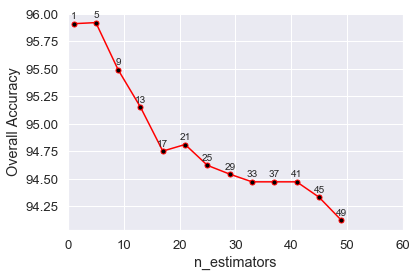

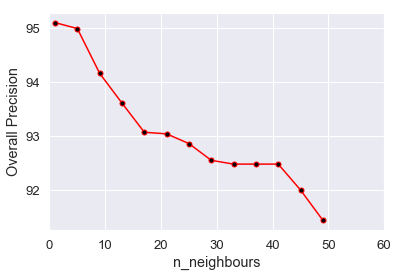

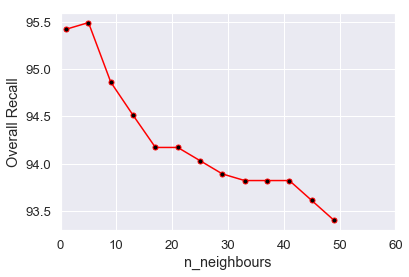

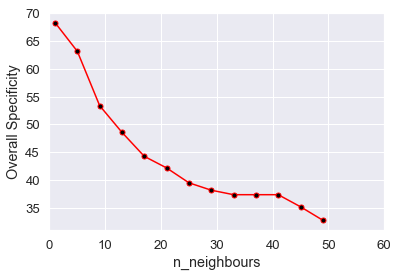

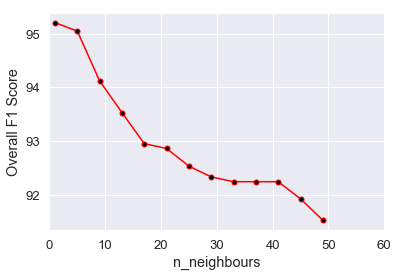

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(n,accu,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_estimators')
plt.ylabel('Overall Accuracy')
plt.xlim(0,60)
for i,txt in enumerate(n):
    ax.annotate(txt,(n[i],accu[i]),textcoords='offset points',xytext=(0,5),ha='center')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(n,ppv,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_neighbours')
plt.ylabel('Overall Precision')
plt.xlim(0,60)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(n,sen,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_neighbours')
plt.ylabel('Overall Recall')
plt.xlim(0,60)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(n,spec,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_neighbours')
plt.ylabel('Overall Specificity')
plt.xlim(0,60)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(n,f1,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_neighbours')
plt.ylabel('Overall F1 Score')
plt.xlim(0,60)
plt.show()


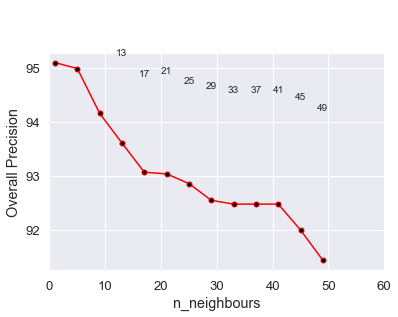

In [15]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(n,ppv,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_neighbours')
plt.ylabel('Overall Precision')
plt.xlim(0,60)

plt.show()

In [8]:
measures = ['Precision','Recall','Specificity','F1 Score','Accuracy']
value = [96.77,96.80,81.60,97.02,96.78]
performance = []

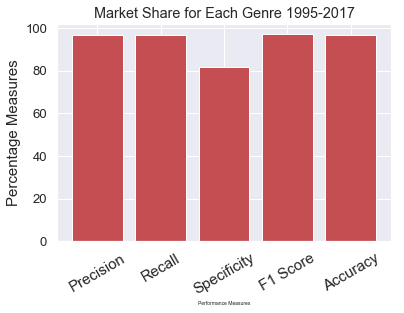

In [9]:
plt.bar(measures, value, color='r')
index = np.arange(len(measures))
plt.xlabel('Performance Measures', fontsize=5)
plt.ylabel('Percentage Measures', fontsize=15)
plt.xticks(index, measures, fontsize=15, rotation=30)
plt.title('Market Share for Each Genre 1995-2017')
plt.show()

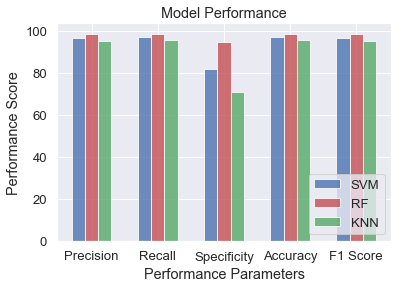

In [82]:
# data to plot
n_groups = 5
svm = (96.77,96.80,81.60,97.02,96.78)
knn = (95.26,95.49,70.67,95.81,95.35)
rf = (98.54,98.47,94.69,98.50,98.52)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
 
rects1 = plt.bar(index, svm , bar_width,
alpha=opacity,
color='b',
label='SVM')
 
rects2 = plt.bar(index + bar_width, rf , bar_width,
alpha=opacity,
color='r',
label='RF')

rects3 = plt.bar(index + bar_width + bar_width , knn , bar_width,
alpha=opacity,
color='g',
label='KNN')
 
plt.xlabel('Performance Parameters')
plt.ylabel('Performance Score')
plt.title('Model Performance')
plt.xticks(index + 1*bar_width, ('Precision', 'Recall', 'Specificity', 'Accuracy','F1 Score'))
plt.legend(labels=('SVM','RF','KNN'),loc=4,ncol=1)